# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

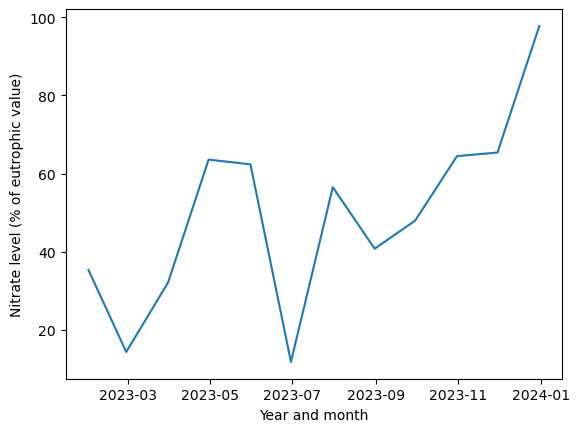

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")
None

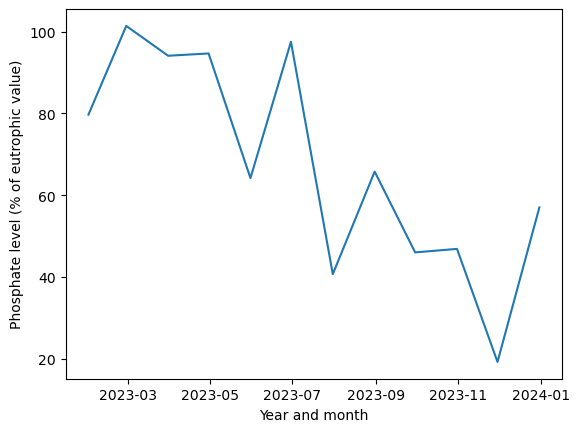

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")
None

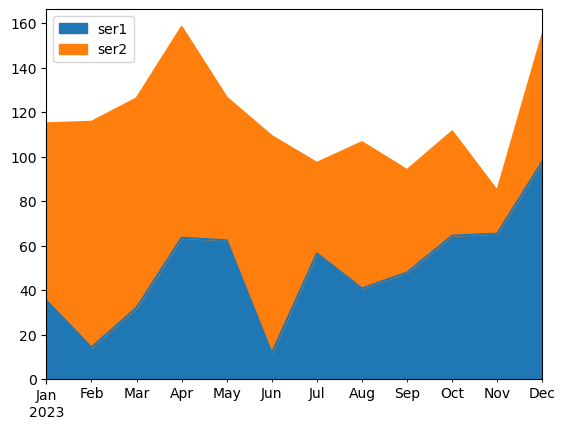

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()
None

### Advantages of showing as an Area Plot
- Direct comparison is easier when the data is shown together in the same plot.
- The x-axis labels are easier to read than the x-axis for the line plots because only the month is displayed instead of the whole date.

### Disadvantages of showing as an Area Plot
- Since the units are in percentages, the scale does not make since for the area plot. How can we have a percentage of 100 and above?
- Depending on your data, the area plot could overlap and misrepresent the highs and lows in the data.
- Area plots are not ideal for comparing different datasets because visually they can confuse the human eye.


### Recommendations
The area plot needs clear labels, titles, and units. If I had to use the area plot, I would change the opacity of the area under the curve in case of overlap and fix the funkiness that is happening with the scale. I would choose the two line plots to show the data because the area plot is confusing visually. Ideally, I would create a line plot with both datasets on them so that they can be compared on the same scale. I'd also change the x-axis labels for the line plots to just the month to better show the change over time by month. I'd highlight the last three months for both nitrate and phosphorous levels to show where current production is at.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [5]:
# Load Phishing Email Dataset from Kagglehub
# https://www.kaggle.com/datasets/subhajournal/phishingemails?select=Phishing_Email.csv

phishing_email = pd.read_csv('Phishing_Email.csv', index_col=0)

In [6]:
# Summarize and explore raw data
phishing_email.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [7]:
phishing_email.dtypes

Email Text    object
Email Type    object
dtype: object

In [8]:
# Convert Email Text column to string type
phishing_email['Email Text'] = phishing_email['Email Text'].astype('string')

if phishing_email['Email Text'].dtype == 'string':
    print('Sucess!')
else:
    print('Failure.')

Sucess!


In [9]:
# One-hot encode Email Type column for modeling prep
one_hot = pd.get_dummies(phishing_email['Email Type'])
phishing_email_encoded = phishing_email.join(one_hot).copy()

# Convert to binary integers
phishing_email_encoded[['Phishing Email', 'Safe Email']] = phishing_email_encoded[['Phishing Email', 'Safe Email']].astype(int)

# Drop Original Email Type Column
phishing_email_encoded = phishing_email_encoded.drop(columns='Email Type')

# Show Results
phishing_email_encoded.iloc[0:5]

,Email Text,Phishing Email,Safe Email
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1
1,the other side of * galicismos * * galicismo *...,0,1
2,re : equistar deal tickets are you still avail...,0,1
3,Hello I am your hot lil horny toy. I am t...,1,0
4,software at incredibly low prices ( 86 % lower...,1,0


In [10]:
# Check column types to verify that convesions were successful
phishing_email_encoded.dtypes

Email Text        string[python]
Phishing Email             int64
Safe Email                 int64
dtype: object

In [11]:
# Check for missing values
phishing_email_encoded.isnull().sum()

Email Text        16
Phishing Email     0
Safe Email         0
dtype: int64

In [12]:
# Remove missing values
phishing_email_cleaned = phishing_email_encoded.dropna()

# Check to see if cleaning was a success
if phishing_email_cleaned.isnull().sum().sum() == 0:
    print('Null values successfully removed.')
else:
    print('Unsuccessul. Null values remain.')

Null values successfully removed.


In [13]:
# Check for unique values
phishing_email_cleaned['Email Text'].is_unique

False

For now, I am going to leave in the empty emails since an empty email should be flagged as suspicious. However, I'd like to explore taking the empty emails out to see how this effects my analysis. If leaving in the empty emails impacts the effectiveness of the predictive model significantly, one possible solution would be to have a separate filter for empty emails to safe guard against those. In this analysis, I will focus more on the email text.

In [14]:
# Save empty emails to a separate dataframe
empty_emails = phishing_email_cleaned.query("`Email Text` == 'empty'")

In [15]:
# Check for duplicates that are not empty
check_duplicates = phishing_email_cleaned[phishing_email_cleaned.duplicated(keep='first')].query("`Email Text` != 'empty'")
check_duplicates.head()

,Email Text,Phishing Email,Safe Email
770,formal invite for chase . secrets revealed . h...,1,0
1122,schedulec - dailyo 301 . xls the enclosed file...,0,1
1178,<äº‹æ¥­è€…> æ°å:Vip-mail çªç„¶ã®ãƒ¡ãƒ¼ãƒ«...,1,0
1241,pill that will solve your problems i promise ;...,1,0
1485,URL: http://www.askbjoernhansen.com/archives/2...,0,1


In [16]:
print(f'There are a total of {len(check_duplicates)} duplicates that were found.')

There are a total of 565 duplicates that were found.


In [17]:
# Filter out the empty emails and drop duplicates
no_duplicated_emails = phishing_email_cleaned.query("`Email Text` != 'empty'").drop_duplicates()

# Check how many duplicates remain
if no_duplicated_emails.duplicated().sum() == 0:
    print('Sucess!')
else:
    print('Failure.')

Sucess!


In [18]:
# Add the empty email back to the dataset
df_combined = pd.concat([no_duplicated_emails, empty_emails], axis=0)

In [19]:
# Make sure everything worked
if df_combined.duplicated(keep=False).sum() == len(empty_emails):
    print('Only empty duplicates remain. Success!')
else:
    print('Review duplicated rows. Failure.')

Only empty duplicates remain. Success!


In [20]:
df_combined.head()

,Email Text,Phishing Email,Safe Email
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1
1,the other side of * galicismos * * galicismo *...,0,1
2,re : equistar deal tickets are you still avail...,0,1
3,Hello I am your hot lil horny toy. I am t...,1,0
4,software at incredibly low prices ( 86 % lower...,1,0


In [21]:
from textblob import TextBlob

In [ ]:
df_combined['Polarity'] = None
df_combined['Subjectivity'] = None

for i, email in df_combined['Email Text'].items():
    blob = TextBlob(email)
    sentiment = blob.sentiment

    # Add to dataframe
    df_combined.at[i, 'Polarity'] = sentiment.polarity
    df_combined.at[i, 'Subjectivity'] = sentiment.subjectivity

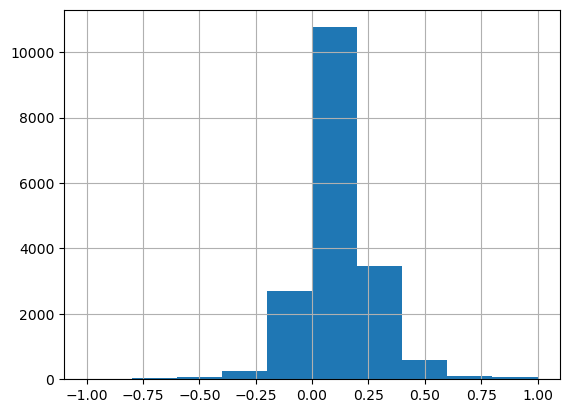

In [ ]:
df_combined['Polarity'].hist()
None

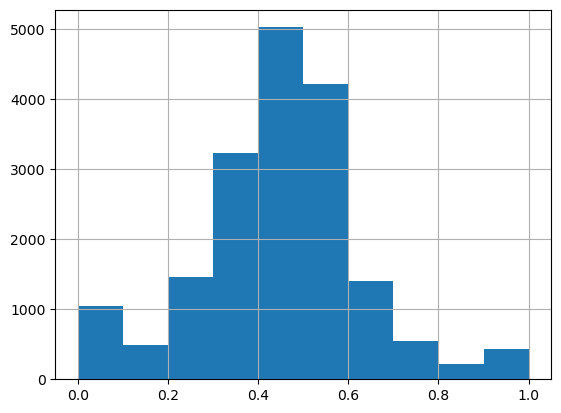

In [ ]:
df_combined['Subjectivity'].hist()
None

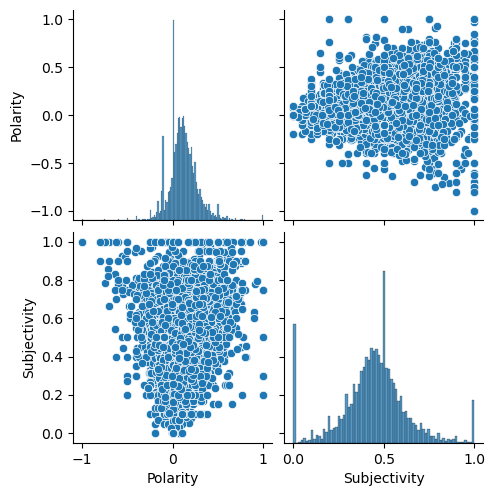

In [ ]:
sns.pairplot(df_combined[['Polarity', 'Subjectivity']])
None

### Conclusions:

This preliminary exploration of my chosen dataset yielded many challenges and insights. First, this dataset had missing values that I decided to remove entirely as I do not think a missing value would help the analysis. However, when exploring the duplicated rows, I discovered that this dataset has a portion of "empty" emails labelled both safe and phishing. This led to some challenges when trying to remove the other dupicated rows as I did not want to remove the "empty" emails. I also explored some rudimentary text analysis using a library called TextBlob. I chose this library because according to the documentation it works well with NLTK and pattern, two other important libraries for analyzing text and is simple to use. I used this library to explore the email texts polarity and subjectivity scores and plotted them in a pair chart to see if there was any relationships. From these charts, it appears that as subjectivty increases, the standard deviation of the polarity increases causing a widening effect. This suggests that when subjectivity is low, the polarity of the text is generally more neutral, where as when subjectivity is high, the polarity can have a wide range.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
# Recreating graph on page 87
Our_Business = [-0.9, 0.6, -0.8, -0.5, 0.7]
Comp_A = [-0.9, 1.0, -0.5, 0.75, 0.6]
Comp_B = [-0.25, -0.4, 0.1, -0.5, -0.9]
Comp_C = [-0.75, -0.25, -0.5, -0.5, -0.1]
Comp_D = [0.5, 0.6, 0.0, 0.0, 0.4]
Comp_E = [1.4, -1.1, 1.0, 0.1, -0.4]
X_axis = [1, 2, 3, 4, 5]

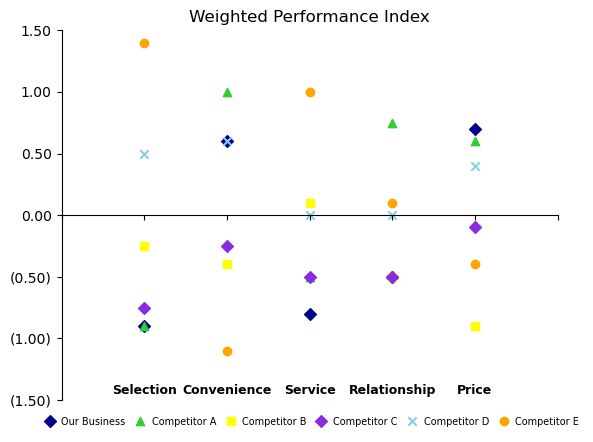

In [ ]:
# Plot the data
fig, ax = plt.subplots()
ax.scatter(X_axis, Our_Business, label='Our Business', marker='D', color='darkblue')
ax.scatter(X_axis, Comp_A, label='Competitor A', marker='^', color='limegreen')
ax.scatter(X_axis, Comp_B, label='Competitor B', marker='s', color='yellow')
ax.scatter(X_axis, Comp_C, label='Competitor C', marker='D', color='blueviolet')
ax.scatter(X_axis, Comp_D, label='Competitor D', marker='x', color='skyblue')
ax.scatter(X_axis, Comp_E, label='Competitor E', marker='o', color='orange')

# Set limits for axis and remove labels on x-axis
ax.set_xlim(0, 6)
ax.set_ylim(-1.5, 1.5)
ax.set_xticklabels([])

# Format y-axis
def format_neg (x, pos):
    if x < 0:
        return f'({abs(x):.2f})'
    return f'{x:.2f}'

ax.yaxis.set_major_formatter(FuncFormatter(format_neg))

# Move x-axis and y-axis to start at zero
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add title
ax.set_title('Weighted Performance Index')

# Create legend
ax.legend(loc='lower center', 
          ncol=6, 
          bbox_to_anchor=(0.5, -0.1), 
          columnspacing=0.5, 
          fontsize=7, 
          handletextpad=0.2, 
          frameon=False,
          handlelength=2,
          handleheight=1.5)

# Add text labels
ax.text(1, -1.45, 'Selection', fontweight='bold', fontsize=9, ha='center')
ax.text(2, -1.45, 'Convenience', fontweight='bold', fontsize=9, ha='center')
ax.text(3, -1.45, 'Service', fontweight='bold', fontsize=9, ha='center')
ax.text(4, -1.45, 'Relationship', fontweight='bold', fontsize=9, ha='center')
ax.text(5, -1.45, 'Price', fontweight='bold', fontsize=9, ha='center')

None